<a href="https://colab.research.google.com/github/mauricionoris/25B3_ml/blob/master/colabs/gradiente_descendente_mse_meshgrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradiente Descendente para Regressão Linear (NumPy)

Neste notebook vamos implementar o algoritmo de Gradiente Descendente
para encontrar os parâmetros (inclinação e intercepto) de uma reta
que minimiza o **Erro Quadrático Médio (MSE)**.

Também vamos visualizar o espaço de parâmetros usando um **meshgrid**
para mostrar as curvas de nível da função de custo.


## 1. Parte Matemática

Queremos ajustar uma reta:

$$ y = w x + b $$

Dados $N$ pontos $(x_i, y_i)$, o **Erro Quadrático Médio** é:

$$ J(w, b) = \frac{1}{N} \sum_{i=1}^{N} (y_i - (w x_i + b))^2 $$

O gradiente de $J$ é dado por:

$$ \frac{\partial J}{\partial w} = -\frac{2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - (w x_i + b)) $$

$$ \frac{\partial J}{\partial b} = -\frac{2}{N} \sum_{i=1}^{N} (y_i - (w x_i + b)) $$

O **Gradiente Descendente** atualiza os parâmetros como:

$$ w \leftarrow w - \alpha \frac{\partial J}{\partial w} $$

$$ b \leftarrow b - \alpha \frac{\partial J}{\partial b} $$

onde $\alpha$ é a **taxa de aprendizado**.


## 2. Geração dos Dados Sintéticos

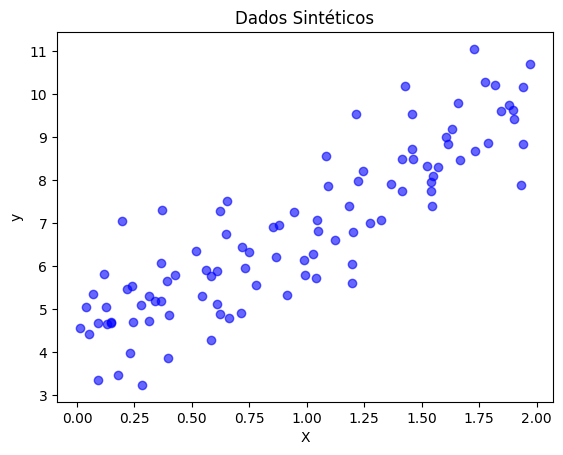

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Semente para reprodutibilidade
np.random.seed(42)

# Dados sintéticos
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # w=3, b=4 + ruído

plt.scatter(X, y, color='blue', alpha=0.6)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Dados Sintéticos")
plt.show()


## 3. Implementação do MSE e do Gradiente

In [2]:

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def compute_gradients(X, y, w, b):
    N = len(y)
    y_pred = X * w + b
    error = y - y_pred
    dw = -(2/N) * np.sum(X * error)
    db = -(2/N) * np.sum(error)
    return dw, db


## 4. Gradiente Descendente

In [3]:

# Inicialização
w = np.random.randn()
b = np.random.randn()
alpha = 0.1
epochs = 50

history = []

for _ in range(epochs):
    dw, db = compute_gradients(X, y, w, b)
    w -= alpha * dw
    b -= alpha * db
    loss = mse_loss(y, X * w + b)
    history.append((w, b, loss))


## 5. Visualizando a Superfície de Custo com Meshgrid

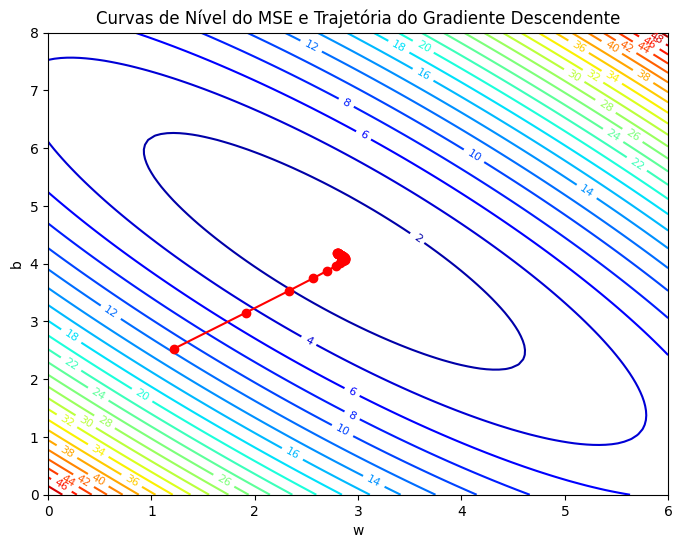

In [4]:

# Geração da malha de valores de w e b
w_values = np.linspace(0, 6, 100)
b_values = np.linspace(0, 8, 100)
W, B = np.meshgrid(w_values, b_values)

Z = np.zeros(W.shape)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Z[i, j] = mse_loss(y, X * W[i, j] + B[i, j])

# Trajetória
w_hist = [h[0] for h in history]
b_hist = [h[1] for h in history]

plt.figure(figsize=(8,6))
cs = plt.contour(W, B, Z, levels=30, cmap='jet')
plt.clabel(cs, inline=True, fontsize=8)
plt.plot(w_hist, b_hist, marker='o', color='red')
plt.xlabel('w')
plt.ylabel('b')
plt.title('Curvas de Nível do MSE e Trajetória do Gradiente Descendente')
plt.show()


## 6. Resultado Final
Parâmetros encontrados:

In [5]:

print(f"w final: {w:.4f}, b final: {b:.4f}, MSE final: {history[-1][2]:.4f}")


w final: 2.7990, b final: 4.1824, MSE final: 0.8069


# Para lembrar

Vamos por partes para ficar bem claro.

## 1. O que são derivadas parciais

Quando temos uma função de várias variáveis, como

$$
f(x, y) = x^2 + y^2
$$

ela depende **simultaneamente** de $x$ e $y$.

A **derivada parcial** mede como a função varia em relação **a uma variável**, mantendo as outras fixas.

* Derivada parcial de $f$ em relação a $x$:

$$
\frac{\partial f}{\partial x} = 2x
$$

* Derivada parcial de $f$ em relação a $y$:

$$
\frac{\partial f}{\partial y} = 2y
$$

Pense assim: é como perguntar

> “Se eu mexer só no $x$, quanto a função muda, assumindo que $y$ está congelado?”

---

## 2. O ponto onde as derivadas parciais são zero

Quando **todas** as derivadas parciais de uma função são iguais a zero **ao mesmo tempo**, encontramos um **ponto crítico** (ou ponto estacionário).
Matematicamente:

$$
\frac{\partial f}{\partial x} = 0 \quad \text{e} \quad \frac{\partial f}{\partial y} = 0
$$

No exemplo:

* $\frac{\partial f}{\partial x} = 2x = 0 \ \Rightarrow\ x = 0$
* $\frac{\partial f}{\partial y} = 2y = 0 \ \Rightarrow\ y = 0$

Portanto, o ponto crítico é $(0, 0)$.



## 3. O que significa na prática

Em termos geométricos:

* É um ponto onde a inclinação é **zero** em todas as direções principais.
* Pode ser um **mínimo**, **máximo** ou **ponto de sela** (um tipo de “vale” em uma direção e “morro” na outra).

Para descobrir qual deles é, usamos o **teste da matriz Hessiana** (segunda derivada), mas a primeira condição é sempre: **todas as derivadas parciais devem ser zero**.

 **Resumo rápido:**

* Derivada parcial → variação da função em relação a uma variável mantendo as outras fixas.
* Todas as derivadas parciais = 0 → ponto crítico (onde a função “para de subir ou descer” em qualquer direção).

